# TP 4 : Optimisation Convexe

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercice 2 : Descente de gradient pour la regression ridge

In [3]:
# Question 8
import numpy as np

# Génération des données
d = 60 # dimension
n = 50  # nombre de points
X = np.random.randn(n,d) 
y = np.random.randn(n)

In [4]:
# Question 9
lamb = 10**(-1)
spec, _ = np.linalg.eig(X.T@X)
spec_H = np.real(spec)/n + lamb 

In [5]:
mu = lamb
L = np.max(spec_H)
print((mu,L))

(0.1, 4.084817365982024)


In [9]:
print(type(X))
print(np.zeros(d).shape)
print((X@np.ones(d)-y).shape)

<class 'numpy.ndarray'>
(60,)
(50,)


In [10]:
# Question 10
def f(w):
    return np.linalg.norm(y-X@w)**2/(2*n) + lamb/2 * np.linalg.norm(w)**2
def grad_f(w):
    return X.T@(X@w-y)/n + lamb*w

gamma = 2/(L+mu)
T = 500000
values = np.zeros(T)
w = np.zeros(d)
for t in range(T) :
    values[t] = f(w)
    w -= gamma*grad_f(w)
    
opt_w = np.linalg.inv(X.T@X/n+lamb*np.eye(d))@X.T@y/n
values -= f(opt_w)

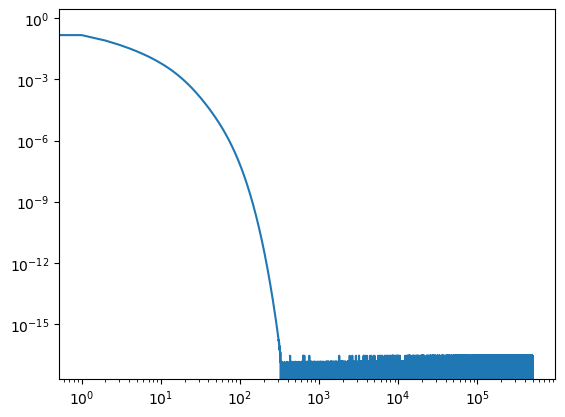

In [9]:
plt.loglog([t for t in range(T)], values)

In [10]:
# Question 11
gamma = 4/((np.sqrt(L)+np.sqrt(mu))**2)
beta = ((np.sqrt(L)-np.sqrt(mu))/(np.sqrt(L)+np.sqrt(mu)))**2
values_hb = np.zeros(T)
w_prec = np.zeros(d)
w = np.zeros(d)
for t in range(T) :
    values_hb[t] = f(w)
    w_new = w - gamma*grad_f(w) + beta*(w-w_prec)
    w_prec = w
    w = w_new 
values_hb -= f(opt_w)

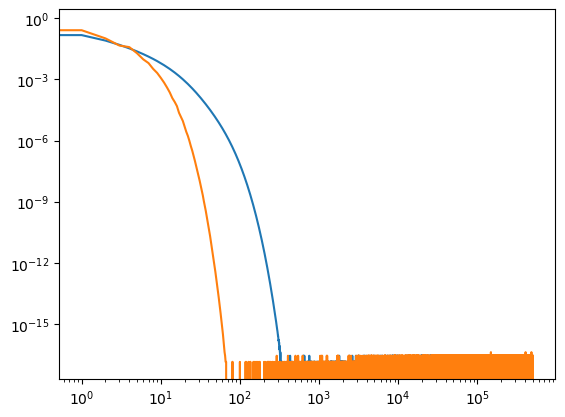

In [11]:
plt.loglog([t for t in range(T)], values, [t for t in range(T)], values_hb)